# Проект по разведывательному анализу данных

### Описание датасета



   - hotel_address — адрес отеля;
   - review_date — дата, когда рецензент разместил соответствующий отзыв;
   - average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
   - hotel_name — название отеля;
   - reviewer_nationality — страна рецензента;
   - negative_review — отрицательный отзыв, который рецензент дал отелю;
   - review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
   - positive_review — положительный отзыв, который рецензент дал отелю;
   - review_total_positive_word_counts — общее количество слов в положительном отзыве.


   - reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
   - total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
   - total_number_of_reviews — общее количество действительных отзывов об отеле;
   - tags — теги, которые рецензент дал отелю;
   - days_since_review — количество дней между датой проверки и датой очистки;
   - additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, - сколько там действительных оценок без проверки.
   - lat — географическая широта отеля;
   - lng — географическая долгота отеля.



In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

# для нормализации, стандартизации
from sklearn import preprocessing

In [128]:
hotels=pd.read_csv('hotels.csv')
hotels.head(5)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [129]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

1. Имеется два признака с частично незаполненными данными - lat и lng.

2. Признак review_date является датой в строковом формате

3. Строковые признаки имеют тип object



In [130]:
# Преобразуем дату из строкового типа в дату
hotels['review_date']=pd.to_datetime(hotels['review_date'])

In [131]:
# Найдем самую ранню дату отзыва
d=hotels[(hotels['review_date']==hotels['review_date'].min())]['review_date']
print(f'Самая ранняя дата отзыва: {d[d.index==d.index.min()]}')

Самая ранняя дата отзыва: 805   2015-08-04
Name: review_date, dtype: datetime64[ns]


In [132]:
# Найдем самую позднюю дату отзыва
d=hotels[(hotels['review_date']==hotels['review_date'].max())]['review_date']
print(f'Самая свежая дата отзыва: {d[d.index==d.index.max()]}')

Самая свежая дата отзыва: 385351   2017-08-03
Name: review_date, dtype: datetime64[ns]


In [133]:
# Копируем данные в новый датафрейм
df=hotels.copy()

In [134]:
# Определим количество полных дублей в записях
df.duplicated ().value_counts()

False    386496
True        307
Name: count, dtype: int64

In [135]:
# удалим дубли
df=df.drop_duplicates()


In [136]:
# Процедура получает названия городов из признака hotel_address
def get_city(x):
    a=x.split(' ')
    if a[-2]=='United':
       return a[-5]
    else:
        return a[-2] 

In [137]:
# Создаем признак c названием города
df['city']=df['hotel_address'].apply(get_city)

In [138]:
# Определим города, где у отеля пропущены широта или долгота
df[ (df['lng'].isnull()) | (df['lat'].isnull())][['city']].value_counts()

city     
Vienna       1990
Paris         299
Barcelona     159
Name: count, dtype: int64

In [139]:
# Определим, в каких городах пропущена только долгота
df[df['lng'].isnull() ][['city']].value_counts()

city     
Vienna       1990
Paris         299
Barcelona     159
Name: count, dtype: int64

In [140]:
#Определим в каких городах пропущена только широта
df[df['lat'].isnull() ][['city']].value_counts()

city     
Vienna       1990
Paris         299
Barcelona     159
Name: count, dtype: int64

Видим, что широта и долгота пропущены одновременно в отелях из трех городов - Вена, Париж, Барселона.
Заменим пропуски координатами города

In [141]:
# Создаем словарь с широтой и долготой для трех городов
dict={'Vienna': [48.2085, 16.373333], 'Paris':  [48.8535, 2.34888], 'Barcelona':  [41.3888, 2.15899]}

In [142]:
# Процедура подставляет широту, если город Вена, Париж или Барселона и оставляет все, как есть, если другой город
def put_lat(x):
    if x[0] in dict.keys():
        return dict[x[0]][0]
    else:
        return x[1]  

# Процедура подставляет долготу, если город Вена, Париж или Барселона и оставляет все, как есть, если другой город
def put_lng(x):
    if x[0] in dict.keys():
        return dict[x[0]][1]
    else:
        return x[1]      

In [143]:
# Заполняем широту  и долготу для пропущенных значений
df['lat']=df[['city','lat']].apply(put_lat, axis=1)
df['lng']=df[['city','lng']].apply(put_lng, axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_4300\2309350163.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] in dict.keys():
C:\Users\USER\AppData\Local\Temp\ipykernel_4300\2309350163.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x[1]
C:\Users\USER\AppData\Local\Temp\ipykernel_4300\2309350163.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dict[x[0]][0]
C:\Users\USER\AppData\Local\Temp\ipykernel_430

In [144]:
# убеждаемся, что в данных нет пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64         
 9 

In [145]:
# Составим список национальностей клиентов, которые упомянуты в более, чем 4000 отзывов
d=df.groupby(['reviewer_nationality'],as_index=False)['lat'].count()
countries=d[d['lat']>4000]['reviewer_nationality']
countries=list(countries)

In [146]:
# Для выделенного списка самых частовстречающихся национальностей применим one-hot кодирование
for e in countries:
    df[e]=df['reviewer_nationality'].apply(lambda x: 1 if x==e else 0 )

In [147]:
# превратим признак days_since_review в число
df['days_since_review']=df['days_since_review'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [148]:
# выделим из признака review_date признаки год и месяц
df['year']=df['review_date'].dt.year
df['month']=df['review_date'].dt.month

In [149]:
# Функция определяет сезон по месяцу
def season(x):
    if x in [12,1,2]:
       return 1
    if x in [3,4,5]:
       return 2
    if x in [6,7,8]:
       return 3
    if x in [9,10,11]:
       return 4

In [150]:
# Создаем признак   - сезон года
df['season']=df['month'].apply(season)

In [151]:
# выделим признак is_weekend， который равен 1, если дата выпала на выходной и 0 в других случаях
df['is_weekend']=df['review_date'].dt.weekday.apply(lambda x: 1 if x==5 or x==6 else 0)

In [152]:
# создаем признак is_negative_review. он равен 1, если был негативный отзыв и 0, если его не было
df['is_negative_review']=df['negative_review'].apply(lambda x: 0 if x=='No Negative' else 1)

# создаем признак is_positive_review. он равен 1, если был позитивный отзыв и 0, если его не было
df['is_positive_review']=df['positive_review'].apply(lambda x: 0 if x=='No Positive' else 1)

In [153]:
# составим список всех городов
cities=df['city'].unique()

print(f'Всего в датасете {len(cities)}  городов')

Всего в датасете 6  городов


Городов всего 6, поэтому можно применить one-hot кодирование

In [154]:
# применим к городам on-hot кодирование
for city in cities:
    df[city]=df['city'].apply(lambda x: 1 if x==city else 0 )

In [155]:
# Составим множество всех уникальных тегов
lst=[]
for e in df['tags']:
    e=e.replace('[','')
    e=e.replace(']','')
    e=e.replace('\'','')
    lst.extend(e.split(', '))

lst=set(lst)    
print(f'Всего {len(lst)} уникальных тегов')

Всего 2368 уникальных тегов


In [156]:
# Найдем теги, где есть слова night или nights
import re

n=[]
for tag in lst:
    if ('night' in tag) or ('nights' in tag):
        n.append(tag)  

In [157]:
# Составим словарь, где ключом будет тег с количеством ночей, а значением число его встречаний в отзывах
tag_nights={}
for tag in n:
    counter=0
    for e in df['tags']:
        if tag in e:
            counter+=1
    tag_nights[tag]=counter  

In [158]:
# Отсортируем словарь по значению
tag_nights=sorted(tag_nights.items(), key=lambda x: x[1])

print(f'Из тегов, связанных с количеством ночей, чаще всего встречается {tag_nights[-1][0]}')

Из тегов, связанных с количеством ночей, чаще всего встречается  Stayed 1 night 


In [159]:
# Создадим словарь, где ключ - произвольный тег, а значение - число его встречаний
dict_tags={}

for tag in lst:
    counter=0
    for e in df['tags']:
        if tag in e:
            counter+=1
    dict_tags[tag]=counter        

In [160]:
# Отсортируем словрь тегов по значению (число встечений данного тега)
dict_tags = sorted(dict_tags.items(), key=lambda x: x[1])

print(f'В наибольшем числе отзывов представлен тег:   {dict_tags[-1]}')


В наибольшем числе отзывов представлен тег:   (' Leisure trip ', 313353)


In [161]:
# Создадим новый признак - число тегов, поставленных в отзыве
df['num_tags']=df['tags'].apply(lambda x: len(x))

In [162]:
# удалим признаки, которые мы уже заменили категириальными или числовыми
df=df.drop(columns=['review_date','negative_review', 'positive_review', 'hotel_address', 'hotel_name', 'city', 'tags','reviewer_nationality'])

In [163]:
df.columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', ' Australia ', ' Belgium ',
       ' Canada ', ' France ', ' Germany ', ' Ireland ', ' Israel ', ' Italy ',
       ' Netherlands ', ' Saudi Arabia ', ' Switzerland ', ' Turkey ',
       ' United Arab Emirates ', ' United Kingdom ',
       ' United States of America ', 'year', 'month', 'season', 'is_weekend',
       'is_negative_review', 'is_positive_review', 'London', 'Paris',
       'Amsterdam', 'Milan', 'Vienna', 'Barcelona', 'num_tags'],
      dtype='object')

In [164]:
# непрерывные признаки (все)
num_cols=['additional_number_of_scoring', 'average_score',
          'review_total_negative_word_counts', 'total_number_of_reviews',
          'review_total_positive_word_counts',
          'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
          'days_since_review', 'lat', 'lng'
         ]


# категориальные признаки (все)
cat_cols = [ ' Australia ', ' Belgium ',
       ' Canada ', ' France ', ' Germany ', ' Ireland ', ' Israel ', ' Italy ',
       ' Netherlands ', ' Saudi Arabia ', ' Switzerland ', ' Turkey ',
       ' United Arab Emirates ', ' United Kingdom ',
       ' United States of America ', 'year', 'month', 'season', 'is_weekend',
       'is_negative_review', 'is_positive_review', 'London', 'Paris',
       'Amsterdam', 'Milan', 'Vienna', 'Barcelona' ]

In [165]:


# Строим матрицу кореляций по всем числовым признакам
corr_matrix=df[num_cols].corr()


<Axes: >

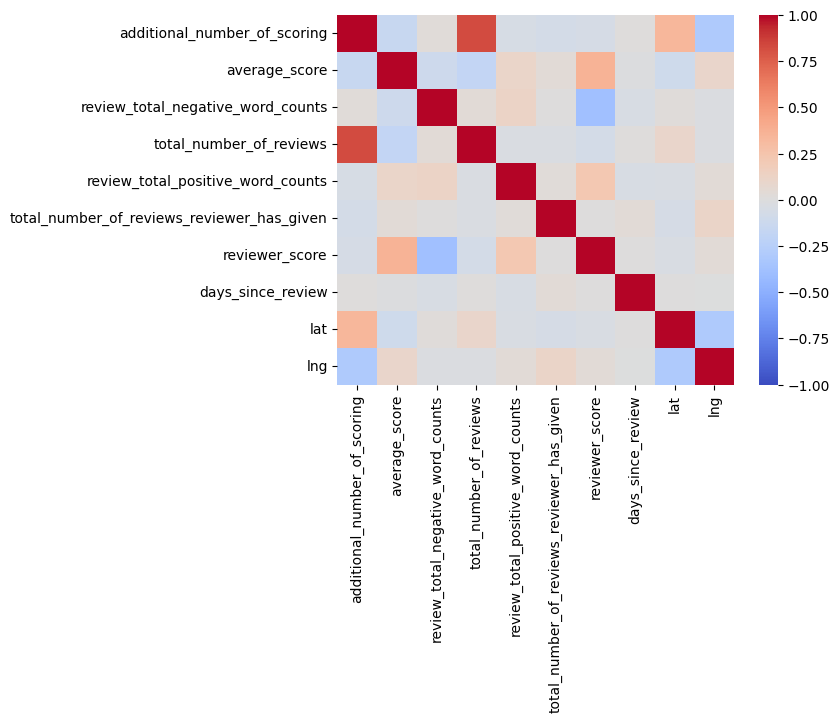

In [166]:
# Строим тепловую карту по матрице корреляций
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="coolwarm")

Видна высокая корреляция между  total_number_of_reviews и additional_number_of_scoring. Следует избавиться от мультиколинеарности, исключив один из признаков.

In [167]:
# непрерывные признаки, которые следует оставить
num_cols = ['review_total_negative_word_counts', 
            'average_score', 
            'review_total_positive_word_counts', 
            'total_number_of_reviews_reviewer_has_given',
             'num_tags',
             'additional_number_of_scoring' , 'days_since_review'               
           ]


# категориальные признаки, которые следует оставить
cat_cols = [' Saudi Arabia ',  
       ' United Arab Emirates ', ' United Kingdom ',
       ' United States of America ',  
       ' Australia ', ' Belgium ',
        ' France ', ' Germany ', ' Israel ', ' Italy ',
       ' Netherlands ',  ' Switzerland ', ' Turkey ',
       ' Canada ', 'Paris', ' Ireland ', 'month',
        'is_negative_review', 'is_positive_review', 'London', 
        'season' ]

In [168]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
    # Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)
X = df.drop(columns=['reviewer_score', 'total_number_of_reviews', 'year', 'is_weekend', 'Amsterdam', 'Milan', 'Vienna',
                      'Barcelona'
                     
                     ], axis = 1)
y = df['reviewer_score']

    # Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.
    # Для тестирования мы будем использовать 25 % от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [169]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
cols=X.columns
# кодируем исходный датасет
X = r_scaler.fit_transform(X)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
X = pd.DataFrame(X, columns=cols)

<Axes: title={'center': 'Распределения после RobustScaler'}, ylabel='Density'>

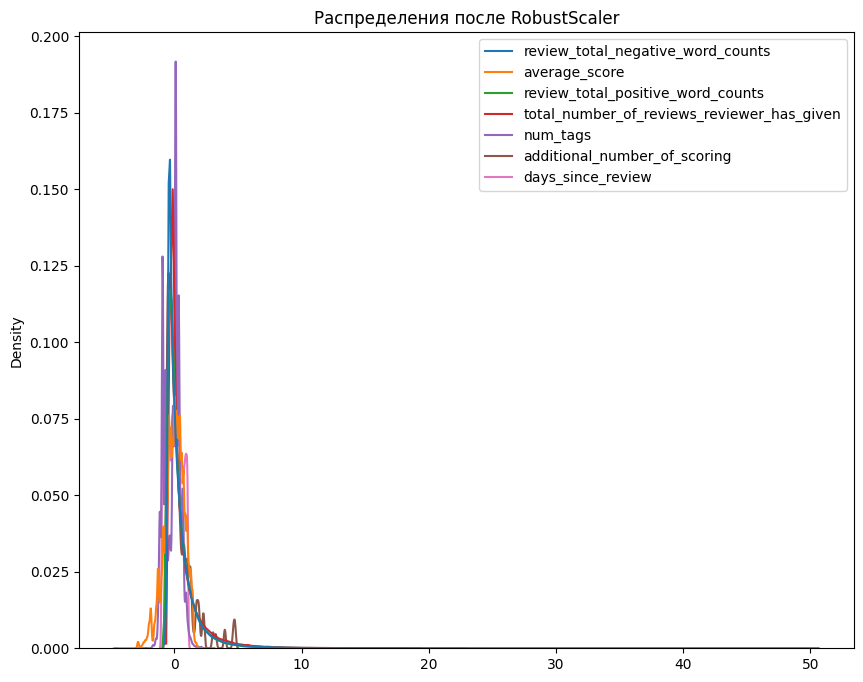

In [170]:
# Смотрим приблизились ли распределения к нормальному
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(X[num_cols], ax=ax1)


<Axes: >

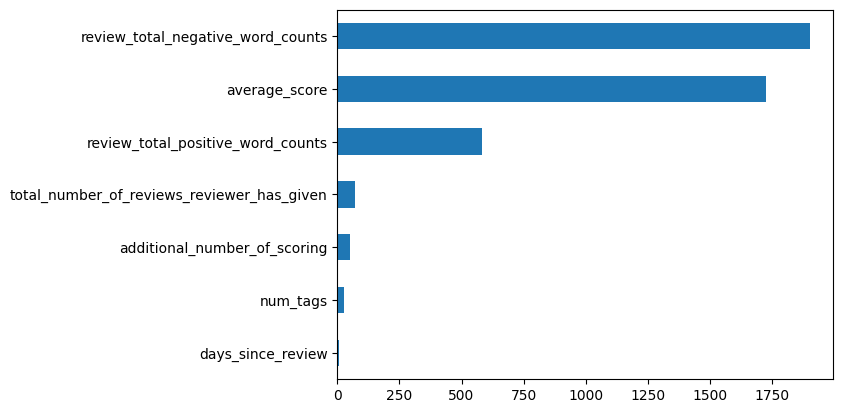

In [171]:
# Смотрим, как влияют числовые признаки на целевой признак после нормализации
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [172]:
# Убираем минус единицы, которые возникли у категориальных признаков после нормализации.
for e in cat_cols:
    X[e]=X[e].apply(abs)

<Axes: >

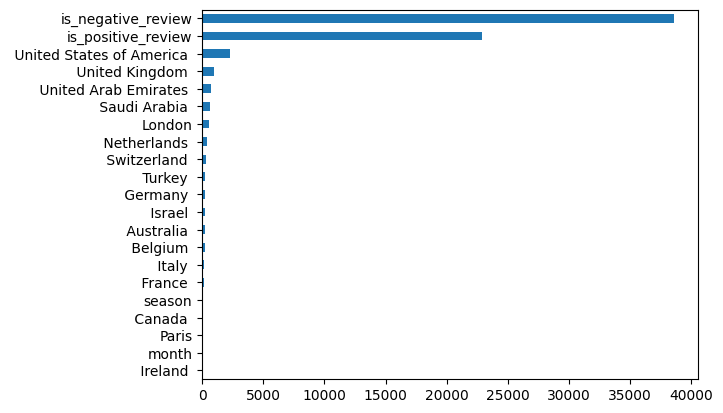

In [173]:
# Проверим с помощью критерия хи-квадрат влияние категориальных признаков на review_score
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [174]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

    # Создаём модель
regr = RandomForestRegressor(n_estimators=100)

    # Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [178]:
  # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических. 
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13629326697871108
